<a href="https://colab.research.google.com/github/SergeyHSE/LinearRegressor.github.io/blob/main/LinearRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in
vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import datetime

In [2]:
# Download your kaggle.json
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c nyc-taxi-trip-duration

 94% 81.0M/85.8M [00:00<00:00, 104MB/s]
100% 85.8M/85.8M [00:00<00:00, 92.8MB/s]


In [5]:
import zipfile

with zipfile.ZipFile('nyc-taxi-trip-duration.zip', 'r') as z:
    with z.open('train.zip') as f:
        df = pd.read_csv(f, compression='zip', header=0, sep=',', quotechar='"')

In [6]:
df = df.drop('dropoff_datetime', axis=1)
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
# Now the dates are written as strings. Let's convert them into python datetime objects.
# This way we will be able to perform arithmetic operations with dates and pull out the necessary information without working with strings.
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [8]:
df = df.sort_values(by='pickup_datetime')

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

#sort date
df = df.sort_values(by='pickup_datetime')

In [9]:
# Let's look at count of passanger by day of week
# Extract day of the week

df['day_of_week'] = df['pickup_datetime'].dt.day_name()

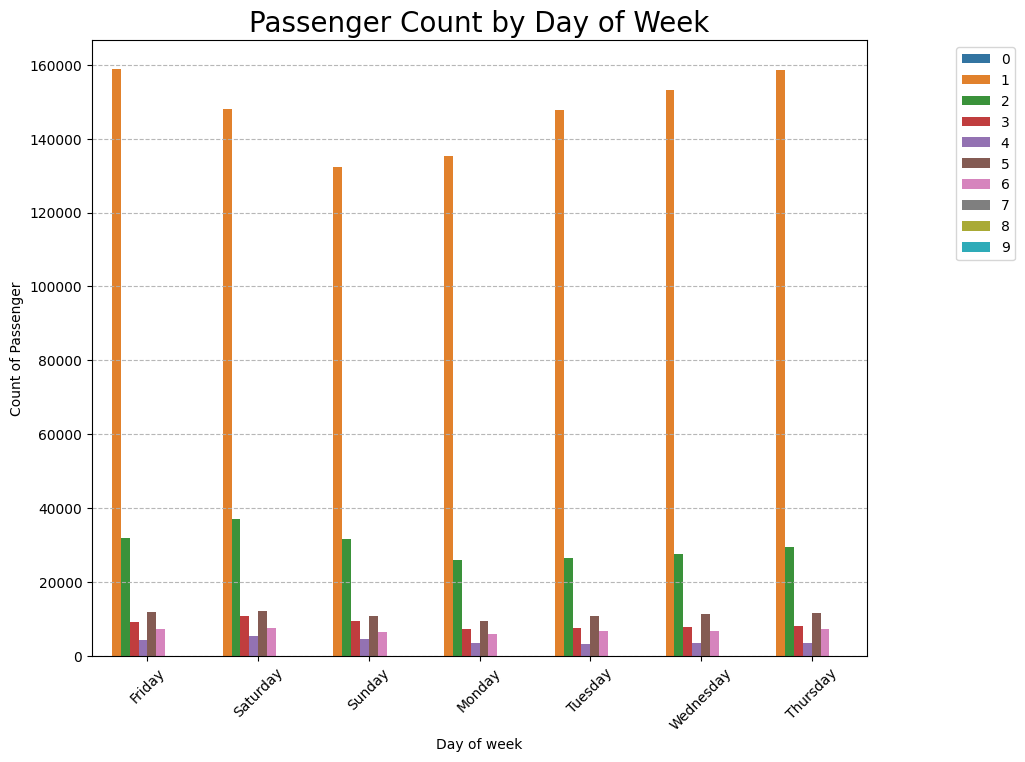

In [ ]:
# Create a countplot
plt.figure(figsize=(10, 8), dpi=100)
ax = sns.countplot(x='day_of_week', data=df, hue='passenger_count')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xlabel('Day of week')
plt.ylabel('Count of Passenger')
plt.title('Passenger Count by Day of Week', fontsize=20)
plt.xticks(rotation=45)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [10]:
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour

<Figure size 1200x800 with 0 Axes>

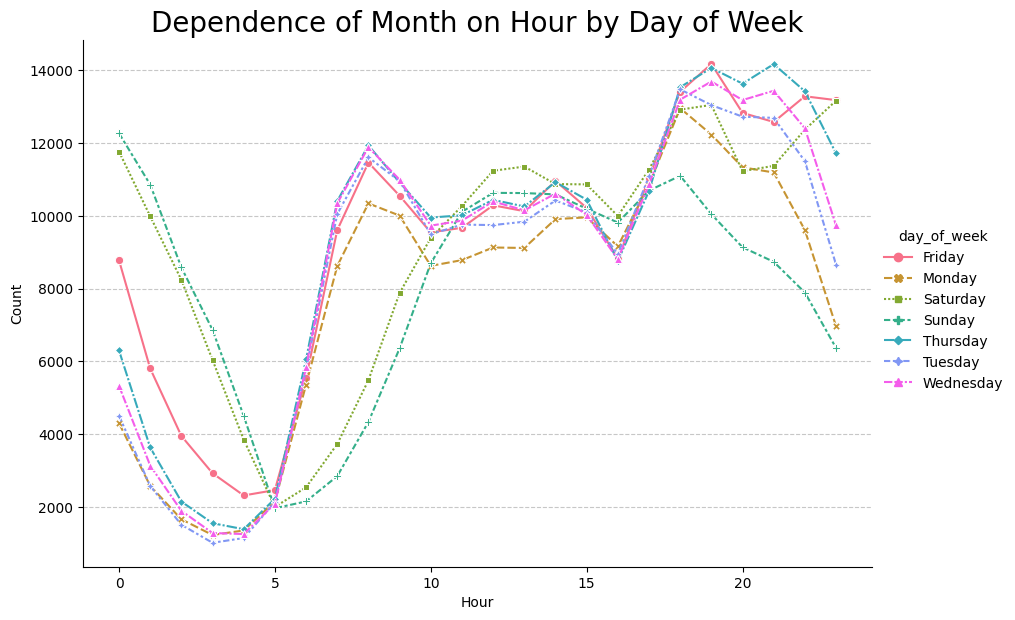

In [ ]:
# Create a line plot

plt.figure(figsize=(12, 8), dpi=100)
sns.set_palette("husl")
sns.relplot(
    hue='day_of_week',
    x='hour',
    y='month',
    data=df.groupby(['day_of_week', 'hour']).count().reset_index(),
    kind='line',
    aspect=1.5,
    height=6,
    style='day_of_week',
    markers=True,
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Dependence of Month on Hour by Day of Week', fontsize=20)
#plt.legend(title='Day of Week', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

We can display on map:

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

In [ ]:
import folium
from IPython.display import HTML
import random

In [ ]:
def display_map(data, latitude_column, longitude_column, color, circle_radius=100,
                zoom_start=10, tiles='Stamen Terrain'):
  location = (data[latitude_column].mean(), data[longitude_column].mean())
  m = folium.Map(location=location, zoom_start=zoom_start, tiles=tiles)
  data.apply(lambda row: folium.Circle(
      radius = circle_radius,
      location=(row[latitude_column], row[longitude_column]),
      color=color,
      fill_color=color,
      fill=True
  ).add_to(m), axis=1)
  return m

my_map = display_map(df.sample(1000), 'pickup_latitude', 'pickup_longitude',
                     'blue', circle_radius=200, zoom_start=12, tiles='OpenStreetMap')

In [ ]:
from IPython.display import display


In [ ]:
display(my_map)

In [ ]:
my_map.save('map.html')

In [ ]:
# To display this map in github you should download 'map.html' and open it in
# browser. Then save it like png and download picture in colab dirrectory
uploaded_map = files.upload()

Saving map_1.png to map_1.png


In [ ]:
from IPython.display import Image

# Set the path to your PNG file
image_path = '/content/map_1.png'

# Display the image in the notebook
Image(filename=image_path)

In [ ]:
# We can add marcers on maps

from folium.plugins import MarkerCluster

# Create separate maps for pickup and dropoff locations
my_map_dropoff = display_map(df.sample(1000), 'dropoff_latitude', 'dropoff_longitude', 'red',
                             circle_radius=200, zoom_start=14, tiles='OpenStreetMap')

my_map_pickup = display_map(df.sample(1000), 'pickup_latitude', 'pickup_longitude', 'blue',
                            circle_radius=200, zoom_start=12, tiles="OpenStreetMap")

# Create MarkerCluster objects for each map
marker_cluster_dropoff = MarkerCluster(name='Dropoff Locations').add_to(my_map_dropoff)
marker_cluster_pickup = MarkerCluster(name='Pickup Locations').add_to(my_map_pickup)

In [ ]:
# Create markers for pickup and dropoff locations and add them to their respective clusters
for _, row in df.sample(1000).iterrows():
    folium.CircleMarker(
        location=(row['dropoff_latitude'], row['dropoff_longitude']),
        radius=10,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        ).add_to(marker_cluster_dropoff)

    folium.CircleMarker(
        location=(row['pickup_latitude'], row['pickup_longitude']),
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
    ).add_to(marker_cluster_pickup)

In [ ]:
# Add a layer control to toggle between pickup and dropoff locations
folium.LayerControl(collapsed=False).add_to(my_map_pickup)

# Save or display the combined map
my_map_pickup.save('map_pickup.html')

folium.LayerControl(collapsed=False).add_to(my_map_dropoff)

my_map_dropoff.save('map_dropoff.html')

In [ ]:
display(my_map_dropoff)

In [ ]:
uploaded_pickup = files.upload()

Saving map_pickup.png to map_pickup.png


In [ ]:
display(my_map_dropoff)

In [ ]:
uploaded_dropoff = files.upload()

Saving map_dropoff.png to map_dropoff.png


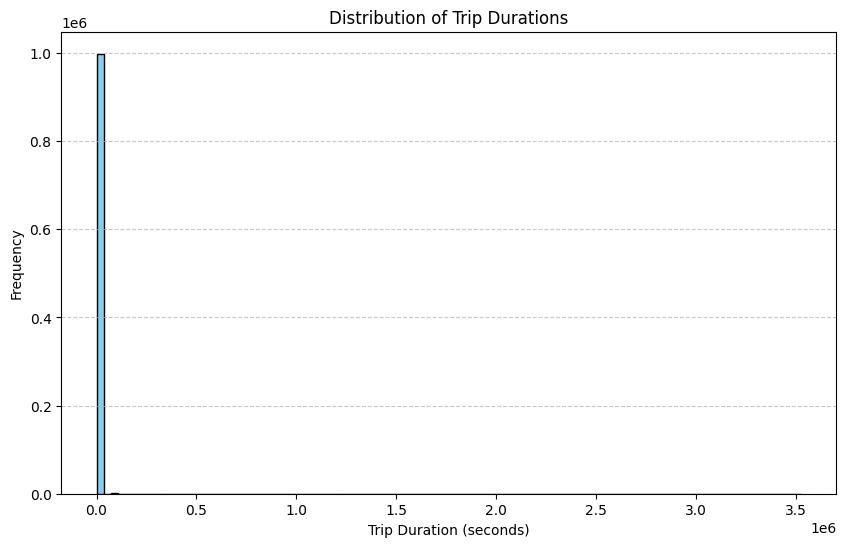

In [11]:
df_train = df[:10 ** 6]
df_test = df[10 ** 6:]
len(df_test)

plt.figure(figsize=(10, 6), dpi=100)
plt.hist(df_train.trip_duration, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

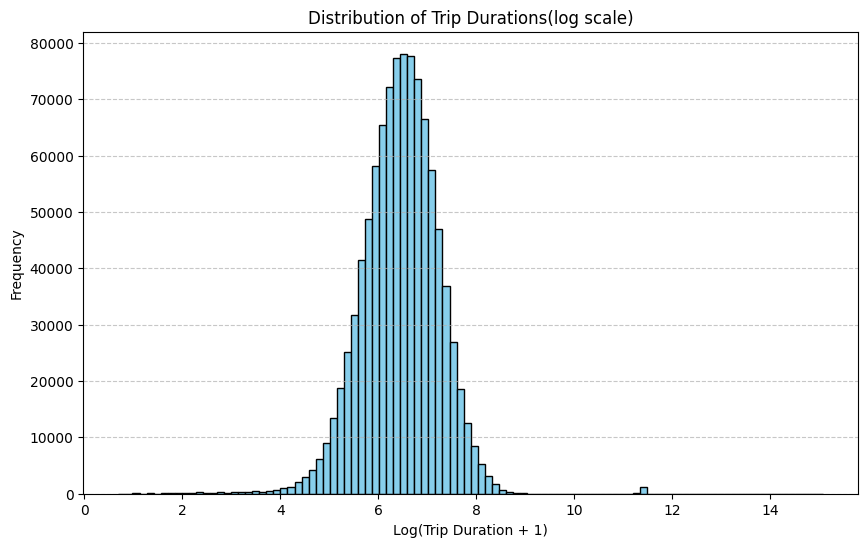

In [12]:
# Let's try to take log(1 + x) from the length of the trip. We add one to avoid problems with trips that, for example, ended instantly.
plt.figure(figsize=(10, 6), dpi=100)
plt.hist(np.log1p(df_train.trip_duration), bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Durations(log scale)')
plt.xlabel('Log(Trip Duration + 1)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
df_train['log_trip_duration'] = np.log1p(df_train.trip_duration)
df_test['log_trip_duration'] = np.log1p(df_test.trip_duration)


<ipython-input-13-05311ce01512>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['log_trip_duration'] = np.log1p(df_train.trip_duration)
<ipython-input-13-05311ce01512>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['log_trip_duration'] = np.log1p(df_test.trip_duration)


In [14]:
#change from list to datetime objects

df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [15]:
# Let's draw what the distribution of the number of trips by day looks like.

date_sorted = df_train.pickup_datetime.apply(lambda x: x.date()).sort_values()

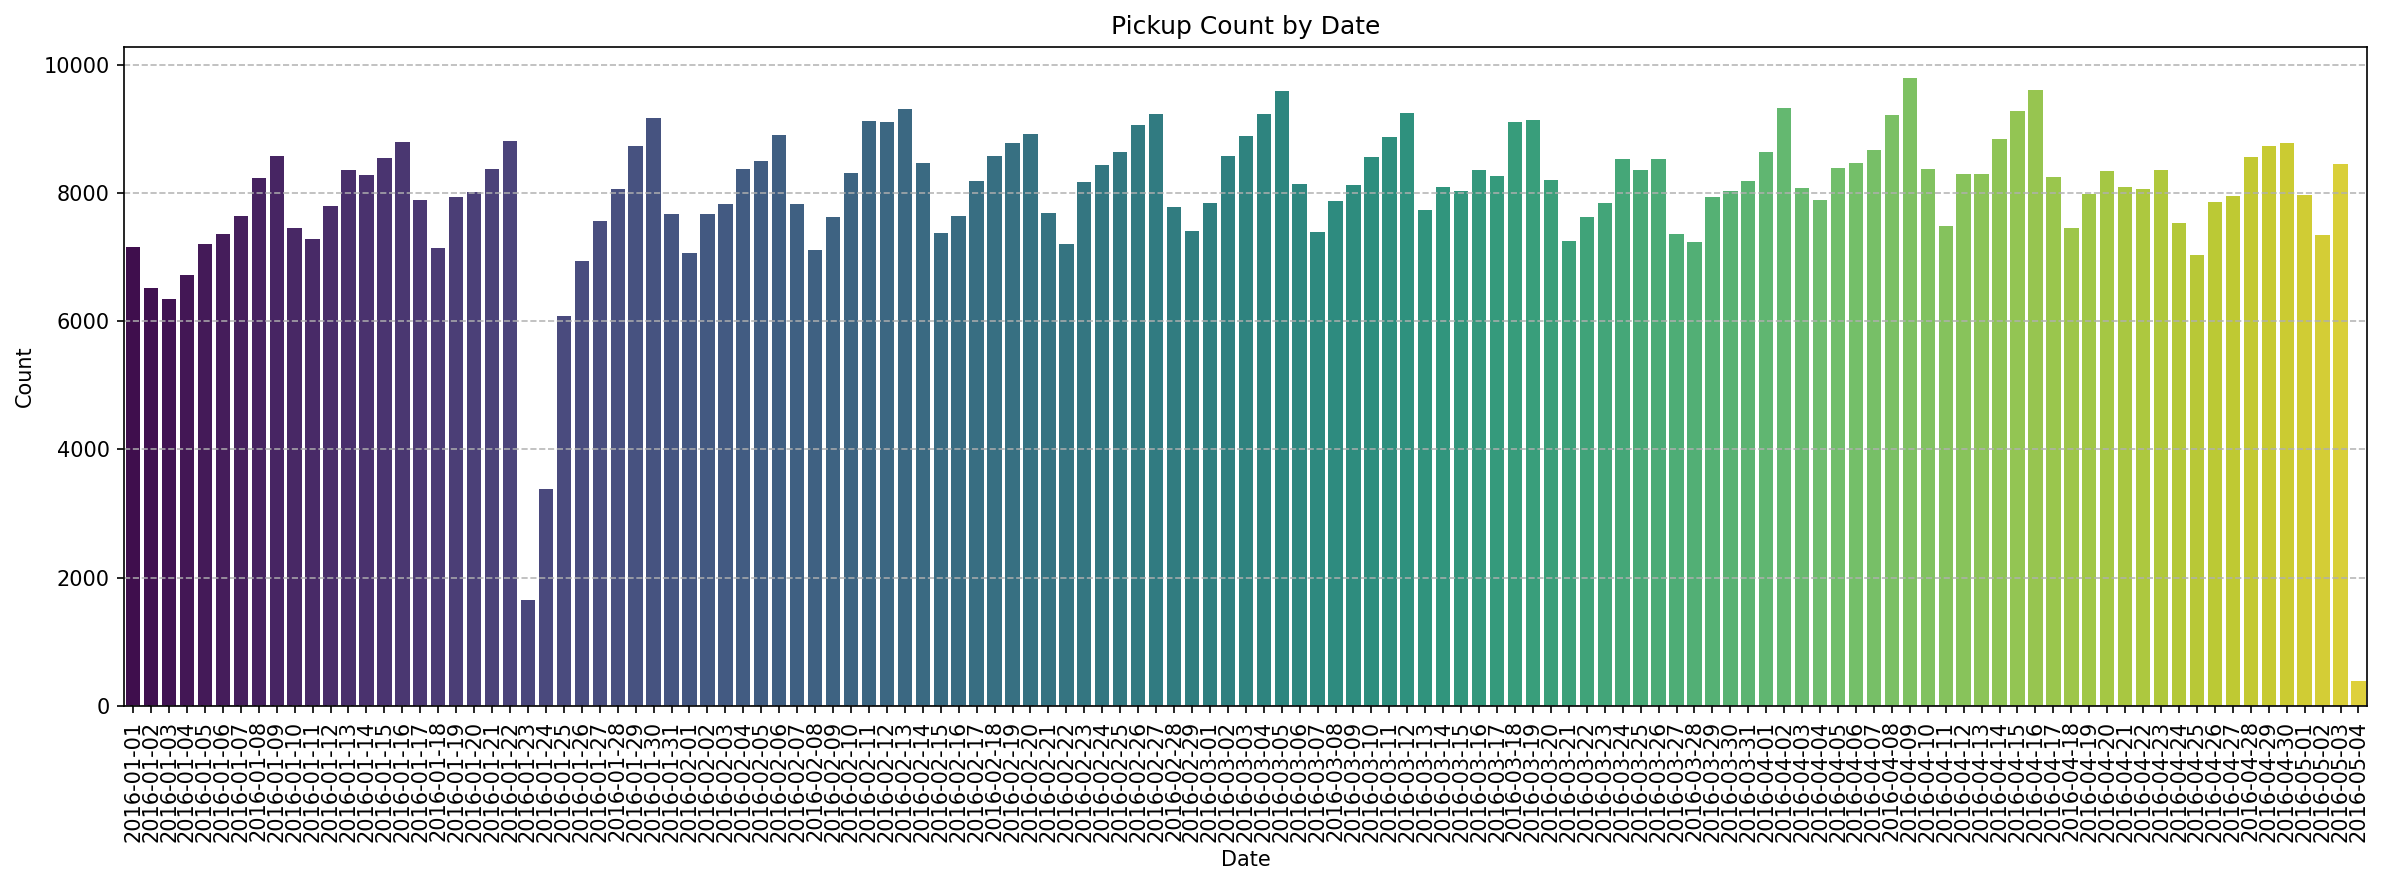

In [ ]:
plt.figure(figsize=(16, 6), dpi=150)
date_count_plot = sns.countplot(x=date_sorted, palette='viridis')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Pickup Count by Date')
date_count_plot.set_xticklabels(date_count_plot.get_xticklabels(), rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [16]:
# Let's see what the distribution by the clock looks like.

df_train['pickup_hour'] = df_train.pickup_datetime.dt.hour

<ipython-input-16-978caa07d004>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['pickup_hour'] = df_train.pickup_datetime.dt.hour


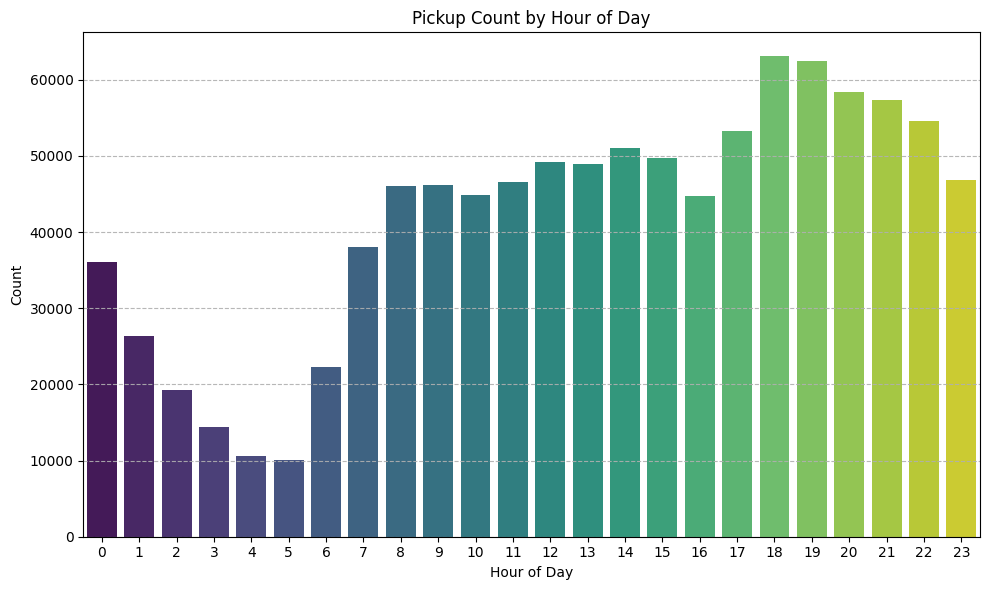

In [ ]:
# Create a countplot for pickups by hour
plt.figure(figsize=(10, 6), dpi=100)
hour_count_plot = sns.countplot(x=df_train['pickup_hour'], palette='viridis')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Pickup Count by Hour of Day')
plt.tight_layout()
plt.show()

In [17]:
# Now let's see how the day and the length of the trip are related.

group_by_weekday = df_train.groupby(df_train.pickup_datetime.apply(lambda x: x.date()))

<Figure size 1400x800 with 0 Axes>

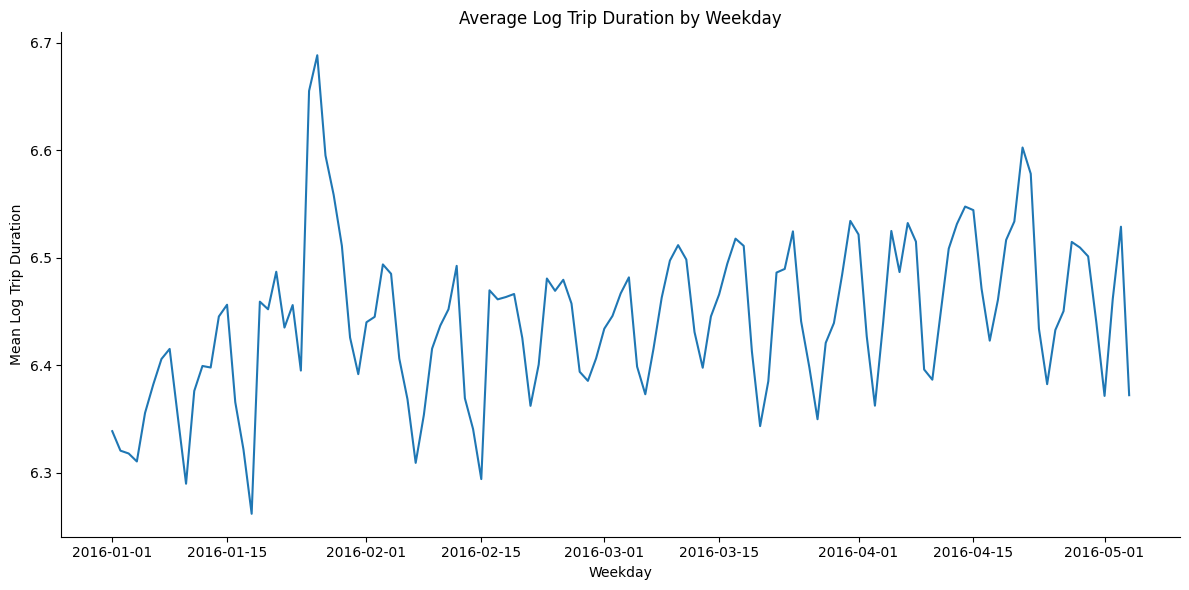

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
sns.relplot(data=group_by_weekday.log_trip_duration.aggregate('mean'), kind='line', height=6, aspect=2)
plt.xlabel('Weekday')
plt.ylabel('Mean Log Trip Duration')
plt.title('Average Log Trip Duration by Weekday')
plt.tight_layout()
plt.show()

**We are gonna prepare the dataset. Let's include the day of the year and the hour of the day in it. We need to write 'create_features' fuction, which
collect necessary attributes for us in a separate DataFrame.**

In [18]:
import datetime
def create_features(data_frame):
    X = pd.concat([data_frame.pickup_datetime.apply(lambda x: x.timetuple().tm_yday),
    data_frame.pickup_datetime.apply(lambda x: x.hour)],
    axis=1, keys=['day', 'hour'])

    return X, data_frame.log_trip_duration

In [19]:
X_train, y_train =  create_features(df_train)
X_train.shape
X_train.head()
X_test, y_test = create_features(df_test)

In [20]:
# We can't use the variable 'hour' like numeric variable, becouse after 23 there is 0.
# Therefore, we apply 'One-Hot' encoding.
ohe = ColumnTransformer([("One hot", OneHotEncoder(sparse=False), [1] )],remainder="passthrough")
X_train = ohe.fit_transform(X_train)
X_test = ohe.fit_transform(X_test)
X_train.shape
X_train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[  1.,   0.,   0., ...,   0.,   0.,   1.],
       [  1.,   0.,   0., ...,   0.,   0.,   1.],
       [  1.,   0.,   0., ...,   0.,   0.,   1.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0., 125.]])

In [21]:
# After that we can use 'Ridge regression' and also select parametrs with GridSearchCV

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lin_reg.predict(X_test))

0.653821900058279

In [22]:
#Regularization
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1000).fit(X_train, y_train)
mean_squared_error(ridge.predict(X_test), y_test)

from sklearn.model_selection import GridSearchCV
grid_searcher = GridSearchCV(Ridge(),
                             param_grid={'alpha': np.linspace(100, 750, 10)},
                             cv=5).fit(X_train, y_train)

grid_searcher.best_params_
mean_squared_error(y_test, grid_searcher.predict(X_test))

0.6538784861219816

In [23]:
# Let's build figure corresponding to the number of trips depending on the day of the week according to the training sample.
import calendar

df_train['day_of_week'] = df_train['pickup_datetime'].apply(lambda x: x.weekday())

# Calculate the count of trips for each day of the week
day_counts = df_train['day_of_week'].value_counts().reset_index()
day_counts.columns = ['day_of_week', 'trip_count']
# Map day of the week index to day name
day_counts['day_of_week'] = day_counts['day_of_week'].map(lambda x: calendar.day_name[x])
# Sort the DataFrame by the count of trips in descending order
day_counts = day_counts.sort_values(by='trip_count', ascending=False)


<ipython-input-23-2afdead38f8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['day_of_week'] = df_train['pickup_datetime'].apply(lambda x: x.weekday())


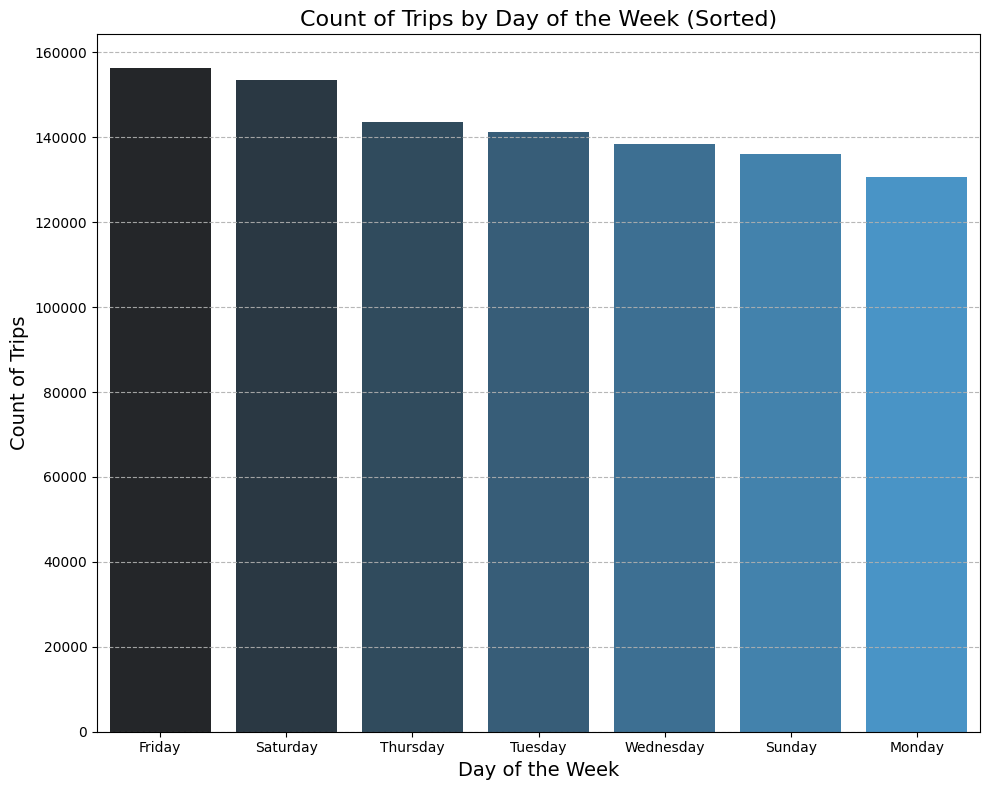

In [24]:
plt.figure(figsize=(10, 8), dpi=100)
week_count_plot = sns.barplot(x='day_of_week', y='trip_count', data=day_counts, palette='dark:#3498db')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.title('Count of Trips by Day of the Week (Sorted)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count of Trips', fontsize=14)
plt.tight_layout()
plt.show()

In [25]:
#Let's add binary variables that equal 1 for two days with minimum count of trips and 0 for other

date_sorted = df.pickup_datetime.apply(lambda x: x.date()).sort_values()
df['pickup_datetime'].dt.date.value_counts()[-5:]

2016-01-03    6353
2016-01-25    6084
2016-05-30    5570
2016-01-24    3383
2016-01-23    1648
Name: pickup_datetime, dtype: int64

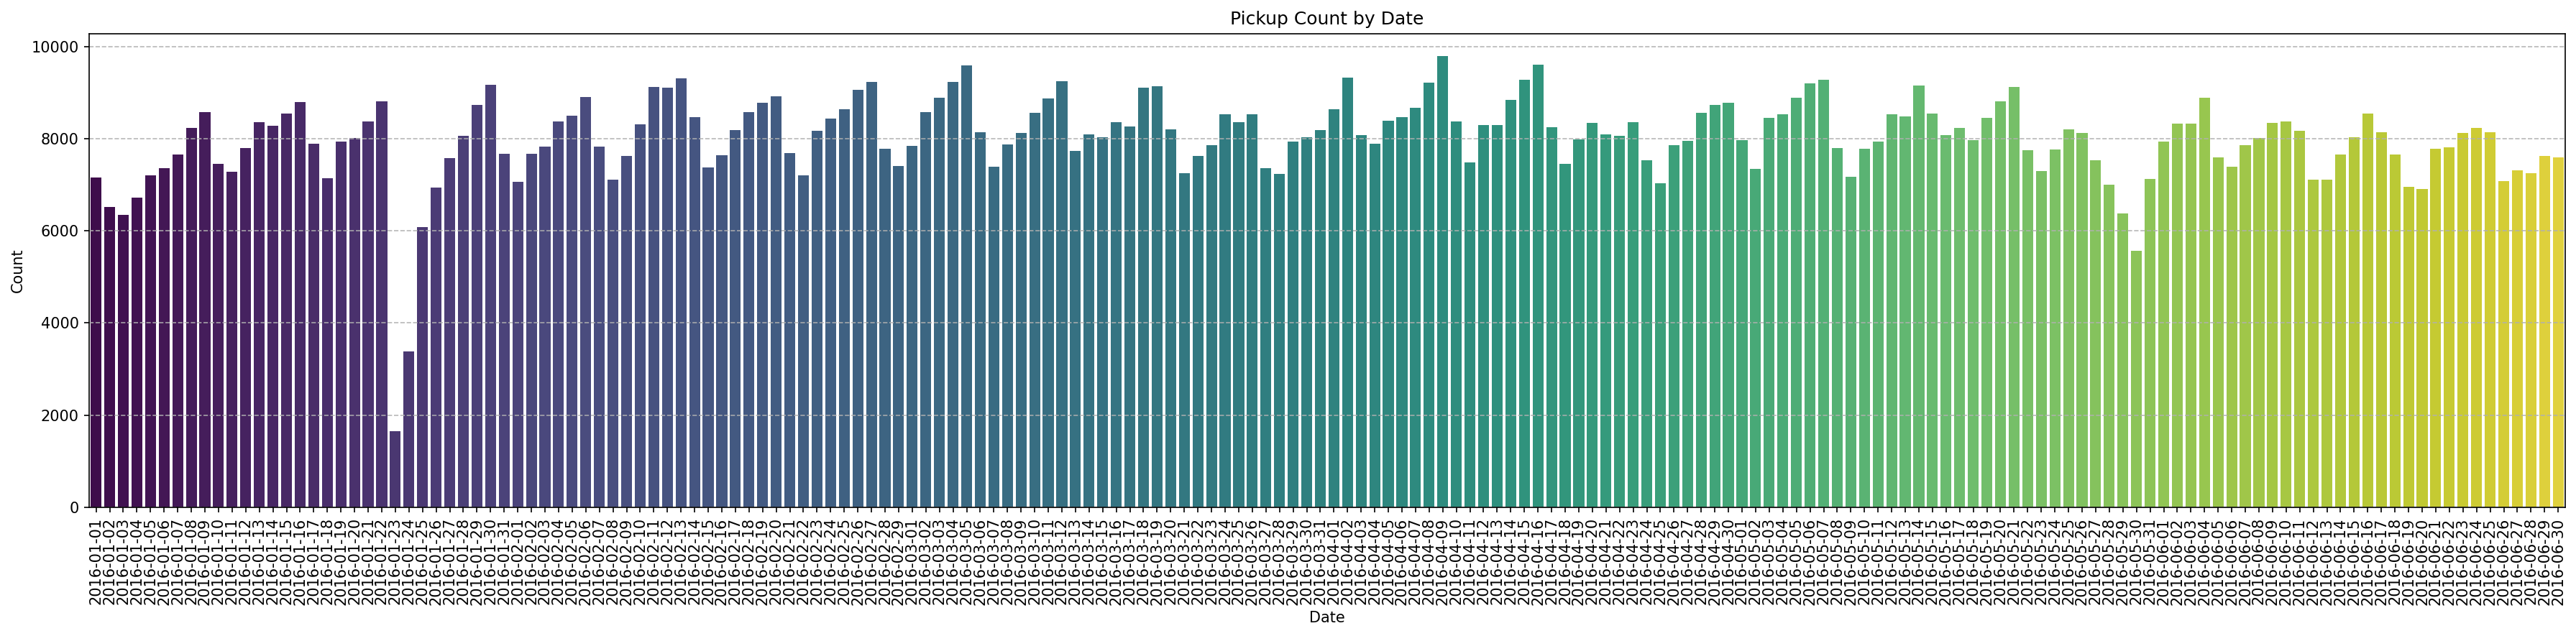

In [26]:
# We also can look at these days by building the figure
plt.figure(figsize=(24, 6), dpi=150)
date_count_plot = sns.countplot(x=date_sorted, palette='viridis')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Pickup Count by Date')
date_count_plot.set_xticklabels(date_count_plot.get_xticklabels(), rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [27]:
# Create target_dates and column 'binary_feture'

target_dates = ['2016-01-24', '2016-01-23']
df_train['binary_feature'] = 0

# Iterate through the DataFrame and set 'binary_feature' to 1 for target dates

for date in target_dates:
    df_train.loc[df_train['pickup_datetime'].dt.date == pd.to_datetime(date).date(), 'binary_feature'] = 1

df_train.head()
df_train['binary_feature'].value_counts()

<ipython-input-27-da197d1a87f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['binary_feature'] = 0


0    994969
1      5031
Name: binary_feature, dtype: int64

In [28]:
# Make the same things for test

df_test['binary_feature'] = 0
df_test.head()

for date in target_dates:
    df_test.loc[df_test['pickup_datetime'].dt.date == pd.to_datetime(date).date(), 'binary_feature'] = 1

df_test.head()
df_test['binary_feature'].value_counts()

<ipython-input-28-e1112e21bdb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['binary_feature'] = 0


0    458644
Name: binary_feature, dtype: int64